***Context***

Advertising is a type of marketing communication used to promote or sell products or services. Advertising is usually paid by sponsors and viewed through various media such as websites, apps, emails and other offline communications. Android is the mobile operating system running on Google OS with about 69% of the market share worldwide. The Google Play Store is the Android app store used to install Android Apps.

Zoom Ads is an advertising agency that wants to perform an analysis on the data of the google play store. They need to understand the trend of applications available on the google play store so that they can decide to focus on promoting advertisements on particular applications which are trending in the market and can lead to maximum profit. As a Data Analyst, you are required to analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

The dataset provided contains information of over 4000+ apps across different categories along with other useful attributes like Ratings, Reviews etc.


Data Description:

- App: Application Name
- Category: Category the app belongs to (Others category contain apps from various different categories excluded from the dataset)
- Rating: Overall user rating of the app
- Reviews: Number of user reviews for the app
- Size: Size of the app in kilobytes
- Installs: Number of user downloads/installs for the app
- Paid/Free: Whether an app is paid or free
- Price: price of an app in dollars
- Content Rating: Age group the app is targeted at
- Ad Supported: whether an app supports an Ad or not (Yes/No)
- In App Purchases: App containing in app purchase feature or not (Yes/No)
- Editors Choice: Whether rated as Editor Choice (Yes/No)

# IMPORT LIBRARIES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## READ DATA

In [4]:
df0 = pd.read_csv(r"C:\Users\User\Desktop\python\Play_Store.csv")

In [5]:
df = df0.copy() #duplicating the original dataset

## DATA OVERVIEW

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000,Free,0.0,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.4,NaN,46.0,100000,Free,0.0,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.0,29.0,100000,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,2.5,11.0,36.0,5000,Free,0.0,Teen,Yes,No,No
4,EA Plus,Others,NaN,12.0,12.0,1000,Free,0.0,Everyone,No,No,No


In [7]:
df.info() #The summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   int64  
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 389.5+ KB


In [8]:
df.shape #deriving the number of rows and columns in the dataset

(4153, 12)

In [9]:
df.isnull().sum() #Checkking for missing values in each columns

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [120]:
df.describe() #statistical summary of the dataset

,Rating,Reviews,Size,Installs,Price
count,4153.000000,4153.000000,4153.000000,4.153000e+03,4153.000000
mean,4.193222,65484.571635,82.254408,3.232706e+06,0.565341
std,0.509128,106202.610297,92.256334,5.421343e+06,8.926313
min,1.000000,1.000000,0.011000,1.000000e+00,0.000000
25%,4.000000,244.000000,22.000000,1.000000e+04,0.000000
50%,4.300000,7573.000000,42.000000,5.000000e+05,0.000000
75%,4.500000,71432.000000,84.000000,5.000000e+06,0.000000
max,5.000000,312204.000000,270.000000,1.997000e+07,399.990000


In [12]:
df.dtypes #Checking out the data types

App                  object
Category             object
Rating              float64
Reviews             float64
Size                float64
Installs              int64
Paid/Free            object
Price               float64
Content Rating       object
Ad Supported         object
In App Purchases     object
Editors Choice       object
dtype: object

# DATA CLEANING

In [13]:
df.duplicated().sum()

np.int64(0)

- There are no duplicates in the dataset

In [121]:
df.isna().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Paid/Free           0
Price               0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [15]:
#Considering dropping the missing values if they are equal or less than 5% threshold
threshold =len(df)*0.05
threshold 

207.65

In [16]:
cols_to_drop = df.columns[df.isna().sum() <= 0.05]
print(cols_to_drop)

Index(['App', 'Category', 'Size', 'Installs', 'Paid/Free', 'Price',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')


In [17]:
df.dropna(subset = cols_to_drop,inplace = True)

In [18]:
df.isna().sum()

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000,Free,0.0,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.4,NaN,46.0,100000,Free,0.0,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.0,29.0,100000,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,2.5,11.0,36.0,5000,Free,0.0,Teen,Yes,No,No
4,EA Plus,Others,NaN,12.0,12.0,1000,Free,0.0,Everyone,No,No,No


In [122]:
#Correcting the missing values using one of the measure of centre
rating_dict = df.groupby('Category')['Rating'].median().to_dict()
print(rating_dict)

{'BOOKS_AND_REFERENCE': 4.4, 'BUSINESS': 4.3, 'COMMUNICATION': 4.05, 'FAMILY': 4.3, 'FINANCE': 4.3, 'GAME': 4.3, 'HEALTH_AND_FITNESS': 4.5, 'LIFESTYLE': 4.3, 'MEDICAL': 4.3, 'Others': 4.3, 'PERSONALIZATION': 4.3, 'PHOTOGRAPHY': 4.2, 'PRODUCTIVITY': 4.2, 'SPORTS': 4.3, 'TOOLS': 4.1}


C:\Users\User\AppData\Local\Temp\ipykernel_2496\3108446740.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_dict = df.groupby('Category')['Rating'].median().to_dict()


In [21]:
df['Rating'] = df['Rating'].fillna(df['Category'].map(rating_dict))

In [22]:
rating_dict = df.groupby('Category')['Reviews'].median().to_dict()

In [23]:
review_dict = df.groupby('Category')['Reviews'].median().to_dict()

In [24]:
print(review_dict)

{'BOOKS_AND_REFERENCE': 1777.5, 'BUSINESS': 125.0, 'COMMUNICATION': 3647.0, 'FAMILY': 2354.5, 'FINANCE': 802.5, 'GAME': 70568.0, 'HEALTH_AND_FITNESS': 8546.0, 'LIFESTYLE': 421.5, 'MEDICAL': 98.5, 'Others': 22804.0, 'PERSONALIZATION': 3175.0, 'PHOTOGRAPHY': 25678.0, 'PRODUCTIVITY': 2537.0, 'SPORTS': 25172.0, 'TOOLS': 657.0}


In [25]:
df['Reviews'] = df['Reviews'].fillna(df['Category'].map(review_dict))

In [26]:
df.isna().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Paid/Free           0
Price               0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [27]:
df.dtypes

App                  object
Category             object
Rating              float64
Reviews             float64
Size                float64
Installs              int64
Paid/Free            object
Price               float64
Content Rating       object
Ad Supported         object
In App Purchases     object
Editors Choice       object
dtype: object

In [28]:
columns = df.select_dtypes(include='object').columns
for col in columns:
    df[col] = df[col].astype('category')

In [29]:
df.dtypes

App                 category
Category            category
Rating               float64
Reviews              float64
Size                 float64
Installs               int64
Paid/Free           category
Price                float64
Content Rating      category
Ad Supported        category
In App Purchases    category
Editors Choice      category
dtype: object

# Exploratory Data Analysis

## Univariate Analysis

In [144]:
df=df[df["Ad Supported"]=="Yes"] # Considering only apps that suport ads

In [145]:
df["Category"].value_counts().sort_values()

Category
BUSINESS                22
MEDICAL                 25
COMMUNICATION           34
PRODUCTIVITY            34
FINANCE                 38
BOOKS_AND_REFERENCE     44
LIFESTYLE               52
PERSONALIZATION         62
HEALTH_AND_FITNESS      63
PHOTOGRAPHY             73
SPORTS                  96
TOOLS                  127
GAME                   351
FAMILY                 423
Others                 764
Name: count, dtype: int64

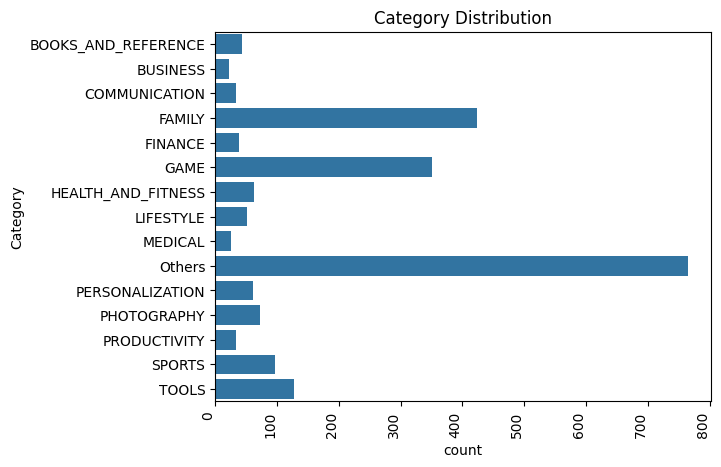

In [146]:
sns.countplot(data=df,y='Category')
plt.title('Category Distribution')
plt.xticks(rotation=90,ha="right")
plt.show()

- Others is the highest category of app in google play store as over 700 apps fall under this category
- Family game and tools top the app list on google play store after the others category
- communication and book reference are the least category of apps found on google play store

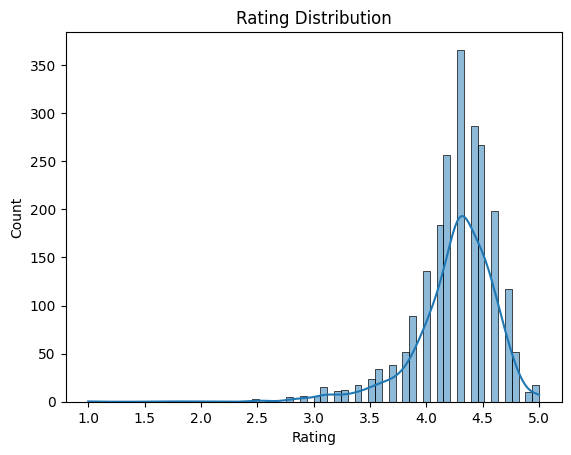

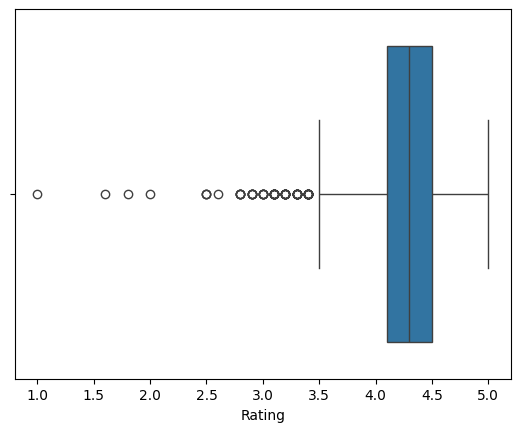

In [147]:
sns.histplot(data = df, x = 'Rating',kde = True)
plt.title('Rating Distribution')
plt.show()

sns.boxplot(data = df, x = 'Rating')
plt.show()

- Most of the apps are rated between 4.0-5.0
- This is a left skewed data

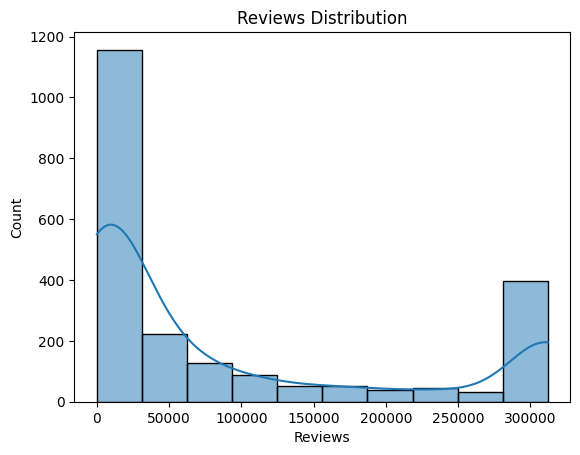

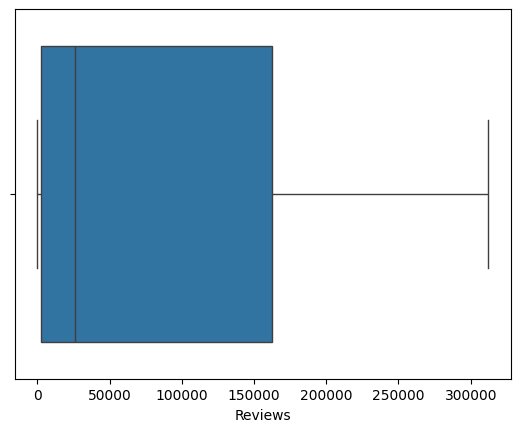

In [148]:
sns.histplot(data = df, x = 'Reviews',bins = 10,kde = True)
plt.title('Reviews Distribution')
plt.show()
sns.boxplot(data=df,x="Reviews")
plt.show()

- This data is rightly skewed
- Most apps on google play store have low rewiews between 0-50000
- There are outliers in this data as some categories tend to have more reviews than the others

In [53]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000,Free,0.0,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.4,125.0,46.0,100000,Free,0.0,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,4.4,1201.0,29.0,100000,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,2.5,11.0,36.0,5000,Free,0.0,Teen,Yes,No,No
4,EA Plus,Others,4.3,12.0,12.0,1000,Free,0.0,Everyone,No,No,No


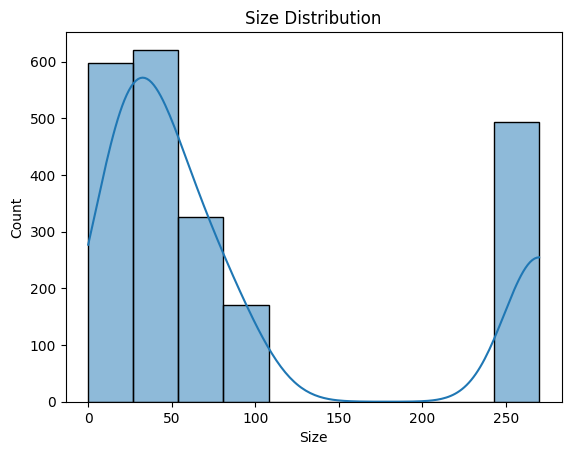

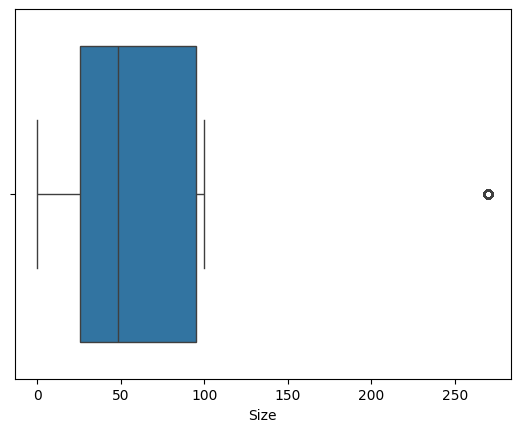

In [149]:
sns.histplot(data = df, x = 'Size',bins = 10,kde = True)
plt.title('Size Distribution')
plt.show()

sns.boxplot(data = df, x = 'Size')
plt.show()

In [150]:
df['Paid/Free'].value_counts()


Paid/Free
Free    2167
Paid      41
Name: count, dtype: int64

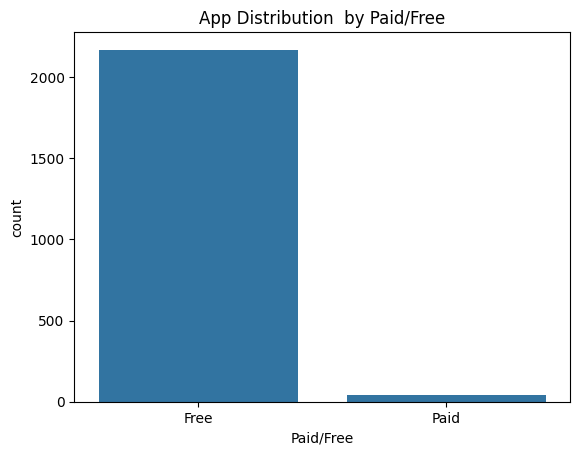

In [151]:
sns.countplot(data = df, x = 'Paid/Free')
plt.title('App Distribution  by Paid/Free')
plt.show()

- Most of the apps on google play store are free

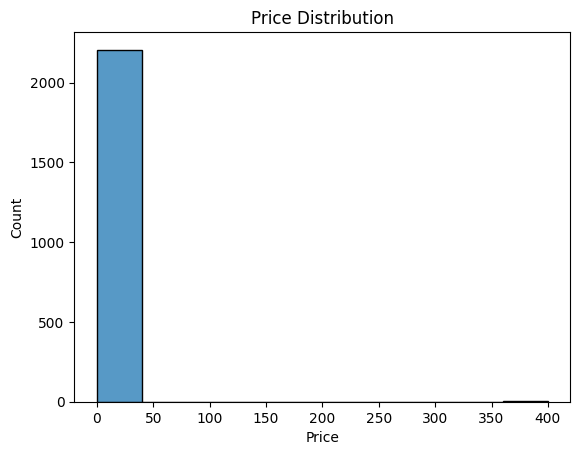

In [152]:
sns.histplot(data=df,x="Price",bins=10 )
plt.title('Price Distribution')
plt.show()

- Most of the apps on google play store are priced between 0-50 dollars

In [79]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000,Free,0.0,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.4,125.0,46.0,100000,Free,0.0,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,4.4,1201.0,29.0,100000,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,2.5,11.0,36.0,5000,Free,0.0,Teen,Yes,No,No
4,EA Plus,Others,4.3,12.0,12.0,1000,Free,0.0,Everyone,No,No,No


In [153]:
df['Content Rating'].value_counts()

Content Rating
Everyone        1623
Teen             342
Everyone 10+     152
Mature 17+        91
Name: count, dtype: int64

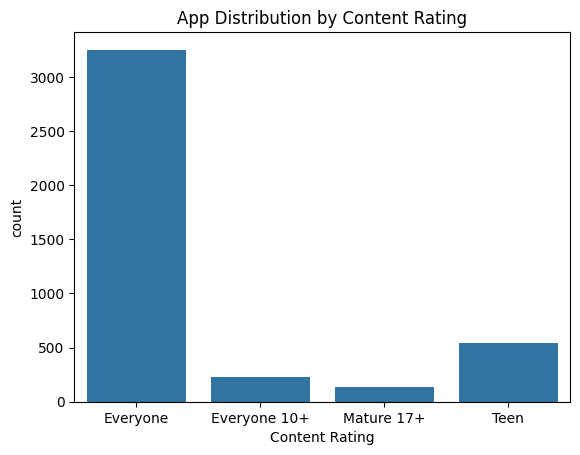

In [87]:
sns.countplot(data=df,x="Content Rating")
plt.title('App Distribution by Content Rating')
plt.show()

- Most of the apps on google playstore are rated "everyone"
- Mature17+ is the least rated app on google play store

- Most apps support ads on google play store

In [156]:
df['In App Purchases'].value_counts()

In App Purchases
Yes    1142
No     1066
Name: count, dtype: int64

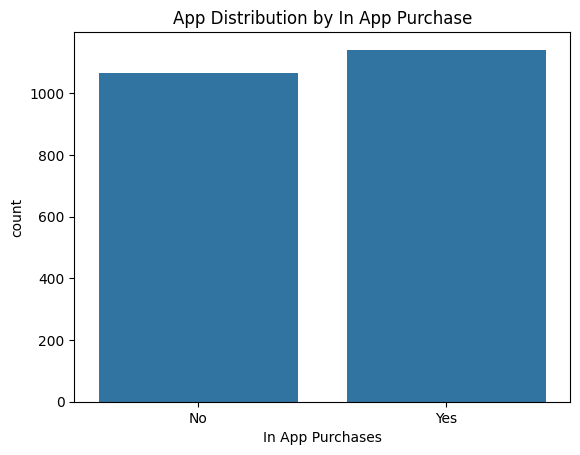

In [157]:
sns.countplot(data=df,x="In App Purchases")
plt.title('App Distribution by In App Purchase')
plt.show()

- Most app on google play store do not support in app purchases

In [135]:
df['Editors Choice'].value_counts()

Editors Choice
No     3304
Yes     849
Name: count, dtype: int64

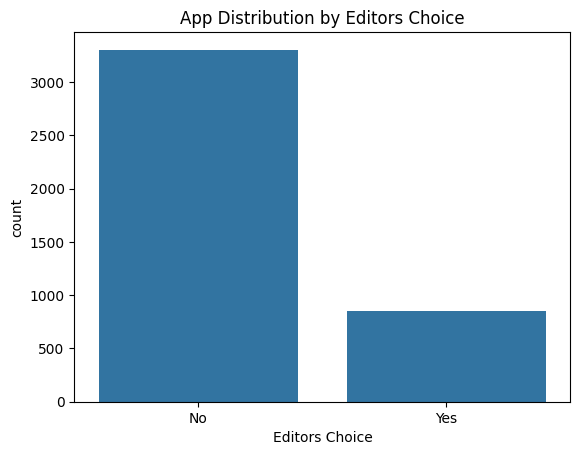

In [96]:
sns.countplot(data=df,x="Editors Choice")
plt.title('App Distribution by Editors Choice')
plt.show()

- Most apps on google play store are not rated as Editors Choice

## BIVARATE ANALYSIS

In [99]:
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000,Free,0.0,Everyone,Yes,Yes,Yes
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,4.4,1201.0,29.0,100000,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,2.5,11.0,36.0,5000,Free,0.0,Teen,Yes,No,No
6,SAMURAI vs ZOMBIES DEFENSE,GAME,4.5,312204.0,19.0,5000000,Free,0.0,Everyone,Yes,Yes,No
8,Draw In,GAME,4.2,46416.0,73.0,10000000,Free,0.0,Everyone,Yes,Yes,No
9,PUBG MOBILE LITE,Others,4.2,312204.0,270.0,19970000,Free,0.0,Teen,Yes,No,Yes
10,Fernanfloo,GAME,4.8,312204.0,49.0,10000000,Free,0.0,Everyone 10+,Yes,Yes,No
11,GUN ZOMBIE,GAME,4.4,243121.0,38.0,5000000,Free,0.0,Teen,Yes,Yes,No
12,Connect'Em Halloween,FAMILY,4.5,6673.0,44.0,500000,Free,0.0,Everyone,Yes,No,No
13,Happy Birthday Songs Offline,Others,4.4,464.0,89.0,100000,Free,0.0,Everyone,Yes,No,No


In [158]:
df.groupby('Category')["Rating"].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_2496\323291680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Category')["Rating"].mean()


Category
BOOKS_AND_REFERENCE    4.390909
BUSINESS               4.400000
COMMUNICATION          4.135294
FAMILY                 4.220095
FINANCE                4.297368
GAME                   4.282906
HEALTH_AND_FITNESS     4.452381
LIFESTYLE              4.198077
MEDICAL                4.308000
Others                 4.266492
PERSONALIZATION        4.279032
PHOTOGRAPHY            4.206849
PRODUCTIVITY           4.205882
SPORTS                 4.220833
TOOLS                  4.156693
Name: Rating, dtype: float64

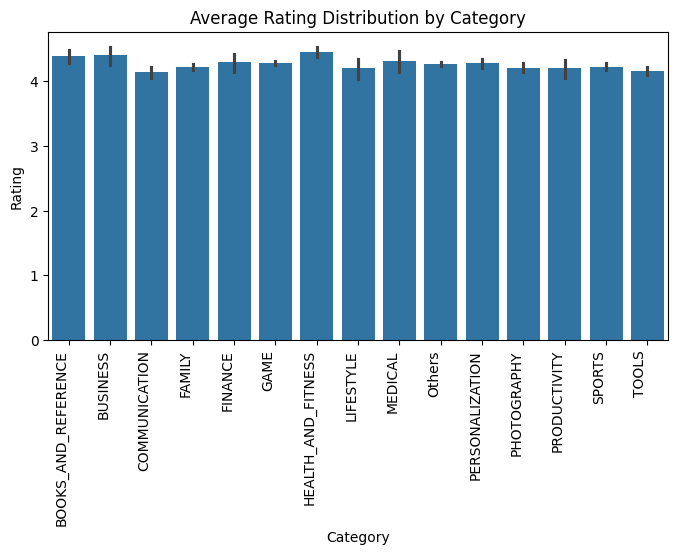

In [159]:
plt.figure(figsize = (8,4)) # the first is the width size and the second the height size
sns.barplot(data=df,x="Category",y="Rating")
plt.xticks(rotation = 90, ha = 'right')
plt.title('Average Rating Distribution by Category')
plt.show()

- All categories have average rating above 4.0

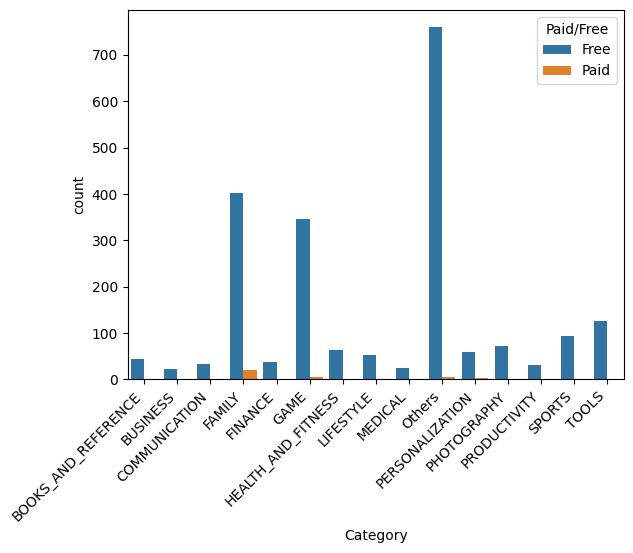

In [160]:
sns.countplot(data=df1,x="Category",hue="Paid/Free")
plt.xticks(rotation=45, ha='right')
plt.show()

- Most apps that support ads on google play store are free
- Across all Categories, Family apps have the highest number of paid apps
- Books and reference, business communication, are entirely free on google play store

In [161]:
df2 = df1.corr(numeric_only = True)

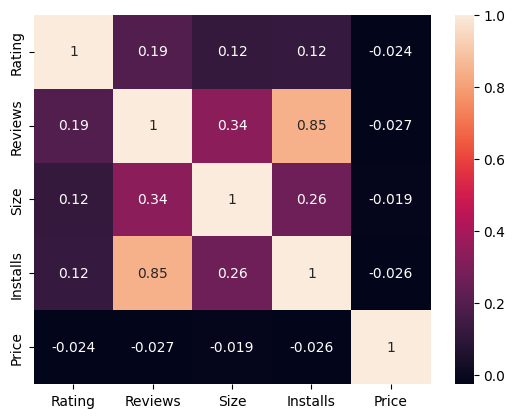

In [162]:
sns.heatmap( df2,annot = True)
plt.show()

- Installs & Reviews has a Strong positive correlation

## Conclusion
- The dataset contains **16 categories**, with most apps belonging to the **Other** category.  
- **Games, Family, and Tools** categories also have a high number of apps on the Play Store.  
- Most apps on the Play Store are **free**, while paid apps are usually priced between **$0–$50**.  
- **Everyone** is the most common content rating, while **Mature 17+** has the least.  
- Free apps tend to have **more installs** compared to paid apps.  
- Most apps do not have an **Editor’s Choice** rating.  
- There is a **strong correlation** between the number of reviews and installs.  

## Recommendations
- **Zoom Ads** should focus their advertisements on apps in the **Family, Other, Tools, and Games** categories, as they dominate the Play Store.  
- Since the majority of apps are **free**, ad investments should primarily target free apps.  
- If considering **paid apps**, focus on those in the **Family** and **Games** categories, as they are more popular.  
- Avoid investing in apps with a **Mature 17+** content rating, as they represent a very small share of the market.  
